In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 7

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/23 [>.............................] - ETA: 7s - loss: 1.9666 - accuracy: 0.1797
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 1s 10ms/step - loss: 1.8287 - accuracy: 0.2780 - val_loss: 1.7325 - val_accuracy: 0.4899
Epoch 2/1000
 1/23 [>.............................] - ETA: 0s - loss: 1.7708 - accuracy: 0.3516
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 1.6617 - accuracy: 0.4206 - val_loss: 1.5678 - val_accuracy: 0.5366
Epoch 3/1000
 1/23 [>.............................] - ETA: 0s - loss: 1.6397 - accuracy: 0.4062
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 1.5294 - accuracy: 0.4705 - val_loss: 1.4364 - val_accuracy: 0.5281
Epoch 4/1000
 1/23 [>.............................] - ETA: 0s - loss: 1.3595 - accuracy: 0.5234


 1/23 [>.............................] - ETA: 0s - loss: 0.7655 - accuracy: 0.7109
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.7882 - accuracy: 0.7022 - val_loss: 0.6126 - val_accuracy: 0.7985
Epoch 29/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.8430 - accuracy: 0.6250
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.6816 - val_loss: 0.5937 - val_accuracy: 0.7911
Epoch 30/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.8641 - accuracy: 0.6953
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.7942 - accuracy: 0.6933 - val_loss: 0.5840 - val_accuracy: 0.8038
Epoch 31/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6245 - accuracy: 0.7500
Epoch 31

 1/23 [>.............................] - ETA: 0s - loss: 0.6301 - accuracy: 0.7578
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.7262 - val_loss: 0.4555 - val_accuracy: 0.8568
Epoch 56/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6659 - accuracy: 0.7344
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.7450 - val_loss: 0.4537 - val_accuracy: 0.8547
Epoch 57/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6204 - accuracy: 0.7578
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.7372 - val_loss: 0.4406 - val_accuracy: 0.8547
Epoch 58/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6712 - accuracy: 0.7031
Epoch 58

 1/23 [>.............................] - ETA: 0s - loss: 0.5609 - accuracy: 0.8281
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.7499 - val_loss: 0.3903 - val_accuracy: 0.8749
Epoch 83/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6050 - accuracy: 0.7891
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.7492 - val_loss: 0.3753 - val_accuracy: 0.8834
Epoch 84/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6214 - accuracy: 0.7812
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.6262 - accuracy: 0.7591 - val_loss: 0.3883 - val_accuracy: 0.8749
Epoch 85/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.4584 - accuracy: 0.8438
Epoch 85

 1/23 [>.............................] - ETA: 0s - loss: 0.5949 - accuracy: 0.7891
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.7729 - val_loss: 0.3543 - val_accuracy: 0.8908
Epoch 110/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.4779 - accuracy: 0.8203
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.7680 - val_loss: 0.3562 - val_accuracy: 0.8897
Epoch 111/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6553 - accuracy: 0.7734
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7775 - val_loss: 0.3526 - val_accuracy: 0.8961
Epoch 112/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5769 - accuracy: 0.7891
Ep

Epoch 136/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7969
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.5808 - accuracy: 0.7832 - val_loss: 0.3416 - val_accuracy: 0.9077
Epoch 137/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5102 - accuracy: 0.8125
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7977 - val_loss: 0.3372 - val_accuracy: 0.9077
Epoch 138/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6416 - accuracy: 0.7891
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.7909 - val_loss: 0.3332 - val_accuracy: 0.9120
Epoch 139/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.6301 - accu

Epoch 163/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5703 - accuracy: 0.7734
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 4ms/step - loss: 0.5442 - accuracy: 0.7927 - val_loss: 0.3261 - val_accuracy: 0.9088
Epoch 164/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5911 - accuracy: 0.7422
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7909 - val_loss: 0.3192 - val_accuracy: 0.9099
Epoch 165/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.4687 - accuracy: 0.8125
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5364 - accuracy: 0.7966 - val_loss: 0.3087 - val_accuracy: 0.9152
Epoch 166/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5532 - accu

Epoch 190/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5904 - accuracy: 0.7812
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.8047 - val_loss: 0.3002 - val_accuracy: 0.9152
Epoch 191/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5540 - accuracy: 0.7969
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7885 - val_loss: 0.3052 - val_accuracy: 0.9173
Epoch 192/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5539 - accuracy: 0.7969
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
23/23 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.8005 - val_loss: 0.3033 - val_accuracy: 0.9183
Epoch 193/1000
 1/23 [>.............................] - ETA: 0s - loss: 0.5456 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 855us/step - loss: 0.3086 - accuracy: 0.9152


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 60ms/step
[3.2072719e-06 4.9017265e-02 9.5097291e-01 1.1356737e-08 6.4932334e-07
 3.0681907e-12 6.0628126e-06]
2


# 混同行列

30/30 [==============================] - 0s 671us/step


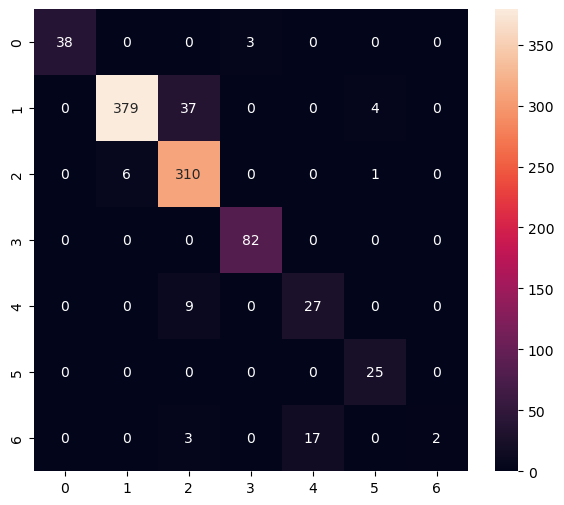

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.98      0.90      0.94       420
           2       0.86      0.98      0.92       317
           3       0.96      1.00      0.98        82
           4       0.61      0.75      0.67        36
           5       0.83      1.00      0.91        25
           6       1.00      0.09      0.17        22

    accuracy                           0.92       943
   macro avg       0.89      0.81      0.79       943
weighted avg       0.92      0.92      0.91       943



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asbot\AppData\Local\Temp\tmpfft8zr6y\assets


6676

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.2072717e-06 4.9017243e-02 9.5097291e-01 1.1356736e-08 6.4932328e-07
 3.0681904e-12 6.0628122e-06]
2
